In [1]:
########################################################################################################################
#                                                          IMPORT                                                      #
########################################################################################################################
import torch
import sys
import os
import json
import numpy as np
sys.path.append('..')

from singleVis.SingleVisualizationModel import VisModel

from singleVis.data import NormalDataProvider

from singleVis.projector import DVIProjector
from singleVis.eval.evaluator import Evaluator

VIS_METHOD = "DVI" # DeepVisualInsight

########################################################################################################################
#                                                     LOAD PARAMETERS                                                  #
########################################################################################################################
CONTENT_PATH = "/home/yifan/0ExpMinist/Default/01"

sys.path.append(CONTENT_PATH)
with open(os.path.join(CONTENT_PATH, "config.json"), "r") as f:
    config = json.load(f)
config = config[VIS_METHOD]

# record output information
# now = time.strftime("%Y-%m-%d-%H_%M_%S", time.localtime(time.time())) 
# sys.stdout = open(os.path.join(CONTENT_PATH, now+".txt"), "w")

SETTING = config["SETTING"]
CLASSES = config["CLASSES"]
DATASET = config["DATASET"]
PREPROCESS = config["VISUALIZATION"]["PREPROCESS"]
GPU_ID = config["GPU"]
EPOCH_START = config["EPOCH_START"]
EPOCH_END = config["EPOCH_END"]
EPOCH_PERIOD = config["EPOCH_PERIOD"]

# Training parameter (subject model)
TRAINING_PARAMETER = config["TRAINING"]
NET = TRAINING_PARAMETER["NET"]
LEN = TRAINING_PARAMETER["train_num"]

# Training parameter (visualization model)
VISUALIZATION_PARAMETER = config["VISUALIZATION"]
LAMBDA1 = VISUALIZATION_PARAMETER["LAMBDA1"]
LAMBDA2 = VISUALIZATION_PARAMETER["LAMBDA2"]
B_N_EPOCHS = VISUALIZATION_PARAMETER["BOUNDARY"]["B_N_EPOCHS"]
L_BOUND = VISUALIZATION_PARAMETER["BOUNDARY"]["L_BOUND"]
ENCODER_DIMS = VISUALIZATION_PARAMETER["ENCODER_DIMS"]
DECODER_DIMS = VISUALIZATION_PARAMETER["DECODER_DIMS"]
S_N_EPOCHS = VISUALIZATION_PARAMETER["S_N_EPOCHS"]
N_NEIGHBORS = VISUALIZATION_PARAMETER["N_NEIGHBORS"]
PATIENT = VISUALIZATION_PARAMETER["PATIENT"]
MAX_EPOCH = VISUALIZATION_PARAMETER["MAX_EPOCH"]

VIS_MODEL_NAME = VISUALIZATION_PARAMETER["VIS_MODEL_NAME"]
EVALUATION_NAME = VISUALIZATION_PARAMETER["EVALUATION_NAME"]



# VIS_MODEL_NAME = 'dvi_grid'

# Define hyperparameters
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")

import Model.model as subject_model
net = eval("subject_model.{}()".format(NET))

# Define data_provider
data_provider = NormalDataProvider(CONTENT_PATH, net, EPOCH_START, EPOCH_END, EPOCH_PERIOD, device=DEVICE, epoch_name='Epoch',classes=CLASSES,verbose=1)


# Define visualization models
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name=VIS_MODEL_NAME, device=DEVICE)    

########################################################################################################################
#                                                      VISUALIZATION                                                   #
########################################################################################################################

from singleVis.visualizer import visualizer

vis = visualizer(data_provider, projector, 200, "tab10")
save_dir = os.path.join(data_provider.content_path, "imgptDVI")
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-06-25 18:40:45.150862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 18:40:45.683392: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-25 18:40:45.683436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

Finish initialization...


<bound method NormalDataProvider.border_representation of <singleVis.data.NormalDataProvider object at 0x7fe2103e8d10>>

no border points saved for Epoch 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 6835.90it/s]


Successfully load the DVI visualization model for iteration 20


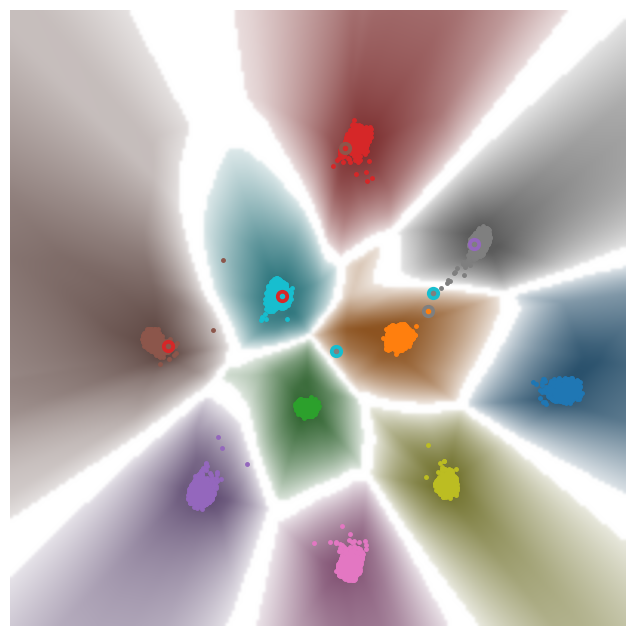

In [5]:
epoch = 20
border = data_provider.border_representation(epoch)

vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))


array([], dtype=float64)

In [3]:
"""get high dimensional grid, 2d grid embedding and border vector"""

grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)
train_data_embedding = projector.batch_project(epoch, data_provider.train_representation(epoch))
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 假设 train_data_embedding 和 grid_emd 都是 numpy arrays，每一行都是一个点
threshold = 1 # 设置你的阈值

# 使用 train_data_embedding 初始化 NearestNeighbors 对象
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_data_embedding)
# 对于 grid_emd 中的每一个点，找到 train_data_embedding 中离它最近的点
distances, indices = nbrs.kneighbors(grid_emd)
# 找到距离小于阈值的索引
mask = distances.ravel() < threshold
selected_indices = np.arange(grid_emd.shape[0])[mask]

border_indices = np.arange(grid_emd.shape[0])[border==1]
union_indices = np.union1d(selected_indices, border_indices)

Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 8342.47it/s]

Successfully load the DVI visualization model for iteration 20


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 8604.58it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 8514.97it/s]


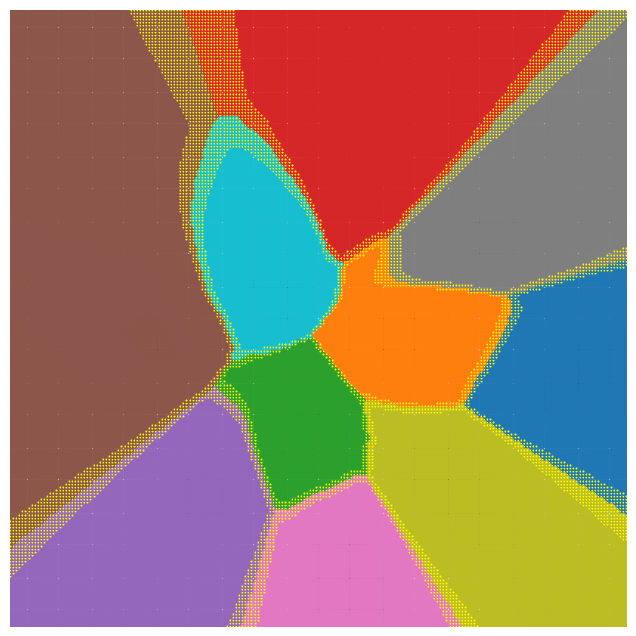

In [4]:
vis.show_grid_embedding(epoch=epoch, data=grid_high, border=border,embedding=grid_emd, noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

In [5]:
import numpy as np

def sample_line(x0, y0, x1, y1, num_samples):
    dx = x1 - x0
    dy = y1 - y0
    step_x = dx / num_samples
    step_y = dy / num_samples

    line_indices = []

    for i in range(num_samples+1):
        x = x0 + i * step_x
        y = y0 + i * step_y
        line_indices.append((int(x), int(y)))

    return line_indices
num_samples = 200 
line_indices = sample_line(grid_emd[0][0], grid_emd[0][1], grid_emd[300][0], grid_emd[300][1],num_samples)

In [6]:
line_indices

[(-57, -57),
 (-56, -57),
 (-56, -57),
 (-56, -57),
 (-56, -57),
 (-55, -57),
 (-55, -57),
 (-55, -57),
 (-54, -57),
 (-54, -57),
 (-54, -57),
 (-53, -57),
 (-53, -57),
 (-53, -57),
 (-53, -57),
 (-52, -57),
 (-52, -57),
 (-52, -57),
 (-51, -57),
 (-51, -57),
 (-51, -57),
 (-50, -57),
 (-50, -57),
 (-50, -57),
 (-49, -57),
 (-49, -57),
 (-49, -57),
 (-49, -57),
 (-48, -57),
 (-48, -57),
 (-48, -57),
 (-47, -57),
 (-47, -57),
 (-47, -57),
 (-46, -57),
 (-46, -57),
 (-46, -57),
 (-45, -57),
 (-45, -57),
 (-45, -57),
 (-45, -57),
 (-44, -57),
 (-44, -57),
 (-44, -57),
 (-43, -57),
 (-43, -57),
 (-43, -57),
 (-42, -57),
 (-42, -57),
 (-42, -57),
 (-41, -57),
 (-41, -57),
 (-41, -57),
 (-41, -57),
 (-40, -57),
 (-40, -57),
 (-40, -57),
 (-39, -57),
 (-39, -57),
 (-39, -57),
 (-38, -57),
 (-38, -57),
 (-38, -57),
 (-37, -57),
 (-37, -57),
 (-37, -57),
 (-37, -57),
 (-36, -57),
 (-36, -57),
 (-36, -57),
 (-35, -57),
 (-35, -57),
 (-35, -57),
 (-34, -57),
 (-34, -57),
 (-34, -57),
 (-34, -57),

In [12]:
show_list = union_indices
vis.show_grid_embedding(epoch=epoch, data=grid_high[[show_list]], border=border[[show_list]],embedding=grid_emd[show_list], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


TypeError: list indices must be integers or slices, not list

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 37/37 [00:00<00:00, 13827.79it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 37/37 [00:00<00:00, 13343.87it/s]


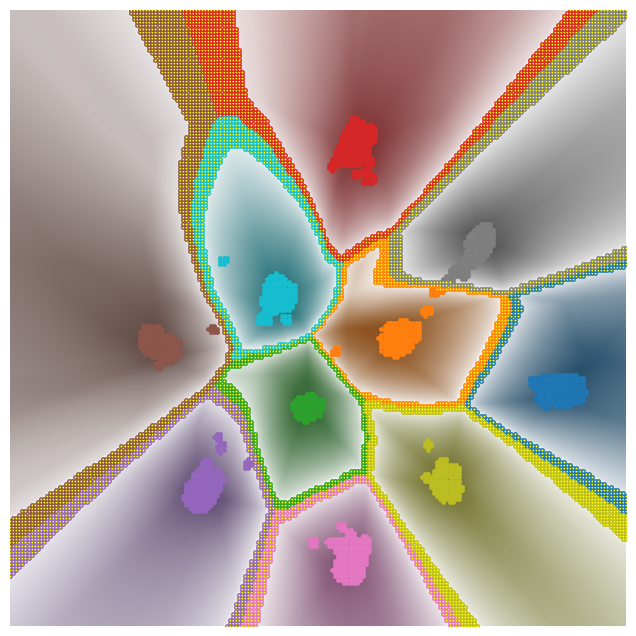

In [7]:
show_list = union_indices
vis.show_grid_embedding(epoch=epoch, data=grid_high[[show_list]], border=border[[show_list]],embedding=grid_emd[show_list], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 37/37 [00:00<00:00, 13275.38it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 37/37 [00:00<00:00, 13201.98it/s]


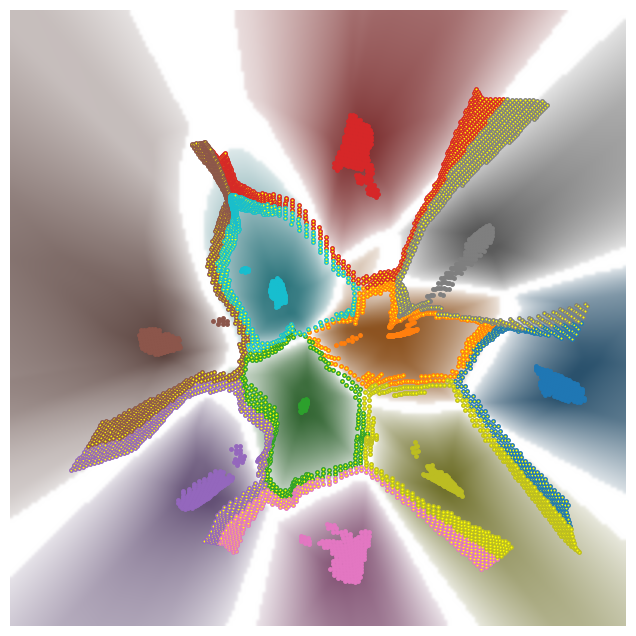

In [8]:
show_list =  union_indices
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[show_list]], border=border[[show_list]],embedding=emb_new[show_list], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 7602.16it/s]

Successfully load the DVI visualization model for iteration 20



/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 13754.93it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 12975.76it/s]


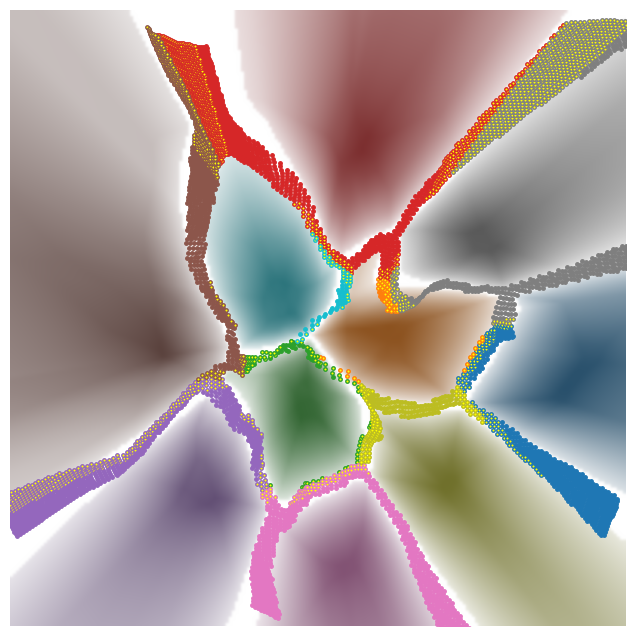

In [28]:
projector2 = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)   
vis2 = visualizer(data_provider, projector2, 200, "tab10")
grid_high2, grid_emd2 ,border = vis2.get_epoch_decision_view(epoch,200,None, True)

emb_new2 = projector2.batch_project(epoch, grid_high2)
vis.show_grid_embedding(epoch=epoch, data=grid_high2[[border_indices]], border=border[[border_indices]],embedding=emb_new2[border_indices], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))


Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 29/29 [00:00<00:00, 13231.24it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 12908.29it/s]


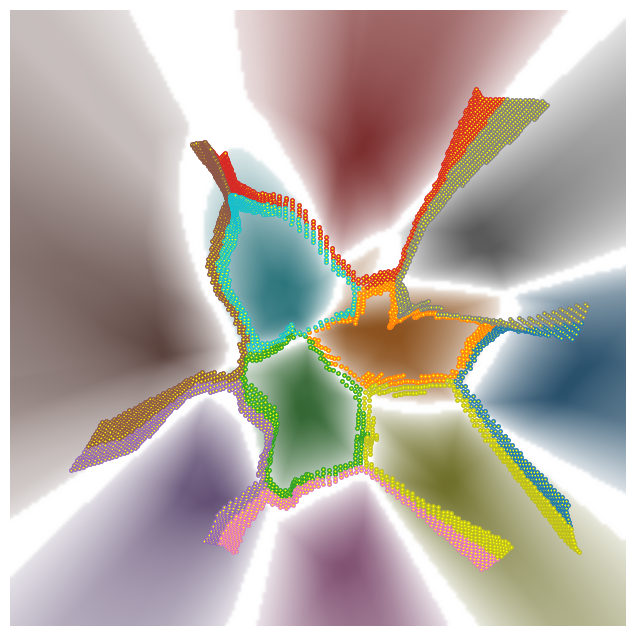

In [7]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[border_indices]], border=border[[border_indices]],embedding=emb_new[border_indices], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

In [12]:
grid_high.shape

(40000, 512)

In [10]:
emb_new.shape

(40000, 2)

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
def calError(grid_high, emb_new):
    k = 5  # 最近邻的数量
    nn_orig = NearestNeighbors(n_neighbors=k+1).fit(grid_high)
    nn_reduced = NearestNeighbors(n_neighbors=k+1).fit(emb_new)
    dist_orig, _ = nn_orig.kneighbors(grid_high, n_neighbors=k+1)
    dist_reduced, _ = nn_reduced.kneighbors(emb_new, n_neighbors=k+1)

    # 计算流形保持误差
    manifold_error = np.mean((dist_orig[:, 1:] - dist_reduced[:, 1:])**2)

    print("Manifold Preservation Error:", manifold_error)



In [8]:
calError(grid_high,emb_new)

NameError: name 'emb_new' is not defined

In [31]:
calError(grid_high2,emb_new2)

Manifold Preservation Error: 0.1813861768602789


In [32]:
calError(grid_high,emb_new2)

Manifold Preservation Error: 0.2069687108715541


In [8]:
"""Add grid into train
"""

from singleVis.SingleVisualizationModel import VisModel
from singleVis.spatial_edge_constructor import SingleEpochSpatialEdgeConstructorForGrid

pre_model = VisModel(ENCODER_DIMS, DECODER_DIMS)
file_path = os.path.join(CONTENT_PATH, "Model", "Epoch_{}".format(epoch), "{}.pth".format('dvi'))
save_model = torch.load(file_path, map_location="cpu")
pre_model.load_state_dict(save_model["state_dict"])
pre_model.to(DEVICE)


VisModel(
  (encoder): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
  )
)

In [9]:
grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)

Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 8735.68it/s]


In [11]:
import time
train_list =  union_indices
# train_list =  border_indices
optimizer = torch.optim.Adam(pre_model.parameters(), lr=.01, weight_decay=1e-5)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=.1)
# Define Edge dataset
t0 = time.time()
###### all grid + training 
# N_NEIGHBORS = 30
spatial_cons = SingleEpochSpatialEdgeConstructorForGrid(data_provider, grid_high[train_list], epoch, S_N_EPOCHS, B_N_EPOCHS, N_NEIGHBORS,only_grid=True)
###### only grid 
# spatial_cons = SingleEpochSpatialEdgeConstructorForGrid(data_provider, grid_high[union_indices], epoch, S_N_EPOCHS, B_N_EPOCHS, N_NEIGHBORS,only_grid=True)
edge_to, edge_from, probs, feature_vectors, attention = spatial_cons.construct()
t1 = time.time()
from singleVis.custom_weighted_random_sampler import CustomWeightedRandomSampler
from singleVis.SingleVisualizationModel import VisModel
from singleVis.losses import UmapLoss, ReconstructionLoss, TemporalLoss, DVILoss, SingleVisLoss, DummyTemporalLoss
from singleVis.edge_dataset import DVIDataHandler
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import DataLoader
probs = probs / (probs.max()+1e-3)
eliminate_zeros = probs>5e-2    #1e-3
edge_to = edge_to[eliminate_zeros]
edge_from = edge_from[eliminate_zeros]
probs = probs[eliminate_zeros]
dataset = DVIDataHandler(edge_to, edge_from, feature_vectors, attention)

n_samples = int(np.sum(S_N_EPOCHS * probs) // 1)
# chose sampler based on the number of dataset
if len(edge_to) > pow(2,24):
    sampler = CustomWeightedRandomSampler(probs, n_samples, replacement=True)
else:
    sampler = WeightedRandomSampler(probs, n_samples, replacement=True)
edge_loader = DataLoader(dataset, batch_size=2000, sampler=sampler, num_workers=8, prefetch_factor=10)
from umap.umap_ import find_ab_params
temporal_loss_fn = DummyTemporalLoss(DEVICE)
# LAMBDA1 = 3
# Define Losses
negative_sample_rate = 5
min_dist = .1
_a, _b = find_ab_params(1.0, min_dist)
umap_loss_fn = UmapLoss(negative_sample_rate, DEVICE, _a, _b, repulsion_strength=1.0)
recon_loss_fn = ReconstructionLoss(beta=1.0)
single_loss_fn = SingleVisLoss(umap_loss_fn, recon_loss_fn, lambd=LAMBDA1)
criterion = DVILoss(umap_loss_fn, recon_loss_fn, temporal_loss_fn, lambd1=LAMBDA1, lambd2=0.0,device=DEVICE)

train_data (8097, 512) if only: True
Wed Jun 21 21:22:22 2023 Building RP forest with 9 trees
Wed Jun 21 21:22:22 2023 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	Stopping threshold met -- exiting after 2 iterations


In [12]:

from singleVis.trainer import SingleVisTrainer
from tqdm import tqdm
from singleVis.losses import PositionRecoverLoss

def disable_grad(model):
    for param in model.parameters():
        param.requires_grad = False   
        
class DVIReFineTrainer(SingleVisTrainer):
    def __init__(self, model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, grid, disable_encoder_grad=False, **kwargs):
        super().__init__(model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, **kwargs)
        self.disable_encoder_grad = disable_encoder_grad
        self.grid = grid

    
    def train_step(self):
        
        self.model = self.model.to(device=self.DEVICE)
        ####### disable encoder
        if self.disable_encoder_grad == True:
            print("dis")
            disable_grad(self.model.encoder)

        self.model.train()
        all_loss = []
        umap_losses = []
        recon_losses = []
        temporal_losses = []
        recoverposition_losses = []
        # loss_fn = PositionRecoverLoss()

        t = tqdm(self.edge_loader, leave=True, total=len(self.edge_loader))
        
        for data in t:
            edge_to, edge_from, a_to, a_from = data

            edge_to = edge_to.to(device=self.DEVICE, dtype=torch.float32)
            edge_from = edge_from.to(device=self.DEVICE, dtype=torch.float32)
            a_to = a_to.to(device=self.DEVICE, dtype=torch.float32)
            a_from = a_from.to(device=self.DEVICE, dtype=torch.float32)

            outputs = self.model(edge_to, edge_from)
            umap_l, recon_l, temporal_l, loss = self.criterion(edge_to, edge_from, a_to, a_from, self.model, outputs)

            grid_high = self.model.decoder(torch.Tensor(self.grid).to(self.DEVICE))
            new_emb = self.model.encoder(grid_high).to(self.DEVICE)

            pos_recover_loss_fn = PositionRecoverLoss(self.DEVICE)

            pos_loss = pos_recover_loss_fn(torch.Tensor(self.grid).to(self.DEVICE), torch.Tensor(new_emb))

            all_loss.append(loss.mean().item())
            umap_losses.append(umap_l.item())
            recon_losses.append(recon_l.item())
            temporal_losses.append(temporal_l.mean().item())
            recoverposition_losses.append(pos_loss.mean().item())
            # ===================backward====================
            recoverposition_loss = sum(recoverposition_losses) / len(recoverposition_losses)
            loss_new = loss + 1 * recoverposition_loss
            self.optimizer.zero_grad()
            loss_new.mean().backward()
            # pos_loss.mean().backward()
            self.optimizer.step()
        self._loss = sum(all_loss) / len(all_loss)
        self.model.eval()
        print('umap:{:.4f}\trecon_l:{:.4f}\ttemporal_l:{:.4f}\tloss:{:.4f}\tecoverposition_losses:{}'.format(sum(umap_losses) / len(umap_losses),
                                                                sum(recon_losses) / len(recon_losses),
                                                                sum(temporal_losses) / len(temporal_losses),
                                                                sum(all_loss) / len(all_loss), sum(recoverposition_losses) / len(all_loss)))
        return self.loss
    
    def record_time(self, save_dir, file_name, operation, iteration, t):
        # save result
        save_file = os.path.join(save_dir, file_name+".json")
        if not os.path.exists(save_file):
            evaluation = dict()
        else:
            f = open(save_file, "r")
            evaluation = json.load(f)
            f.close()
        if operation not in evaluation.keys():
            evaluation[operation] = dict()
        evaluation[operation][iteration] = round(t, 3)
        with open(save_file, 'w') as f:
            json.dump(evaluation, f)

In [13]:
# from singleVis.trainer import DVIReFineTrainer
trainer = DVIReFineTrainer(pre_model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, grid_emd[union_indices], disable_encoder_grad = True)

t2=time.time()
trainer.train(PATIENT, MAX_EPOCH)
t3 = time.time()

    # save result
save_dir = data_provider.model_path
trainer.record_time(save_dir, "time_{}".format(VIS_MODEL_NAME), "complex_construction", str(epoch), t1-t0)
trainer.record_time(save_dir, "time_{}".format(VIS_MODEL_NAME), "training", str(epoch), t3-t2)
save_dir = os.path.join(data_provider.model_path, "Epoch_{}".format(epoch))
trainer.save(save_dir=save_dir, file_name="{}".format('dvi_grid'))

print("Finish epoch {}...".format(epoch))

epoch:1
dis


100%|██████████| 213/213 [00:05<00:00, 42.26it/s]


umap:0.0996	recon_l:0.0313	temporal_l:0.0000	loss:0.1308	ecoverposition_losses:64.36588783443254
epoch:2
dis


100%|██████████| 213/213 [00:04<00:00, 43.16it/s]


umap:0.0997	recon_l:0.0079	temporal_l:0.0000	loss:0.1076	ecoverposition_losses:45.66387627829968
epoch:3
dis


100%|██████████| 213/213 [00:04<00:00, 47.28it/s]


umap:0.0997	recon_l:0.0064	temporal_l:0.0000	loss:0.1061	ecoverposition_losses:45.44588388075851
epoch:4
dis


100%|██████████| 213/213 [00:05<00:00, 40.35it/s]


umap:0.1001	recon_l:0.0056	temporal_l:0.0000	loss:0.1057	ecoverposition_losses:45.16123994639222
epoch:5
dis


100%|██████████| 213/213 [00:04<00:00, 43.74it/s]


umap:0.0996	recon_l:0.0046	temporal_l:0.0000	loss:0.1042	ecoverposition_losses:43.94787964798475
epoch:6
dis


100%|██████████| 213/213 [00:05<00:00, 41.84it/s]

umap:0.0997	recon_l:0.0045	temporal_l:0.0000	loss:0.1042	ecoverposition_losses:44.00848103912784
Time spend: 29.74 for training vis model...
Successfully save visualization model...
Finish epoch 20...


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3696.37it/s]


Successfully load the DVI visualization model for iteration 20


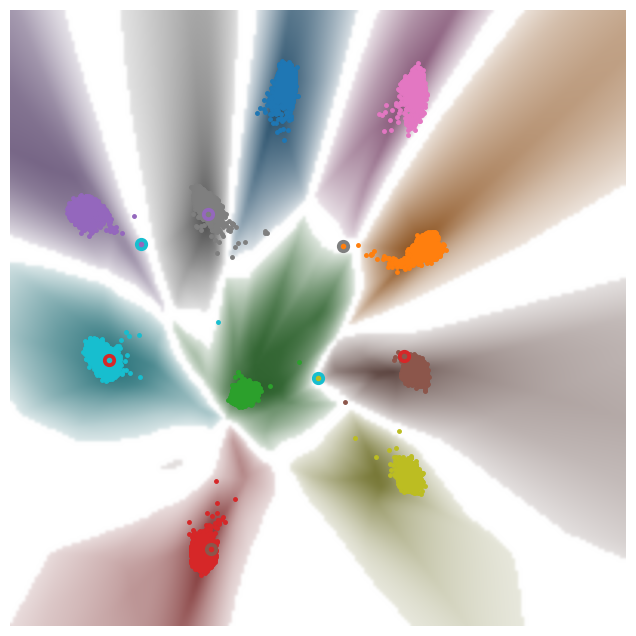

In [14]:
# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)    
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3649.57it/s]


Successfully load the DVI visualization model for iteration 20


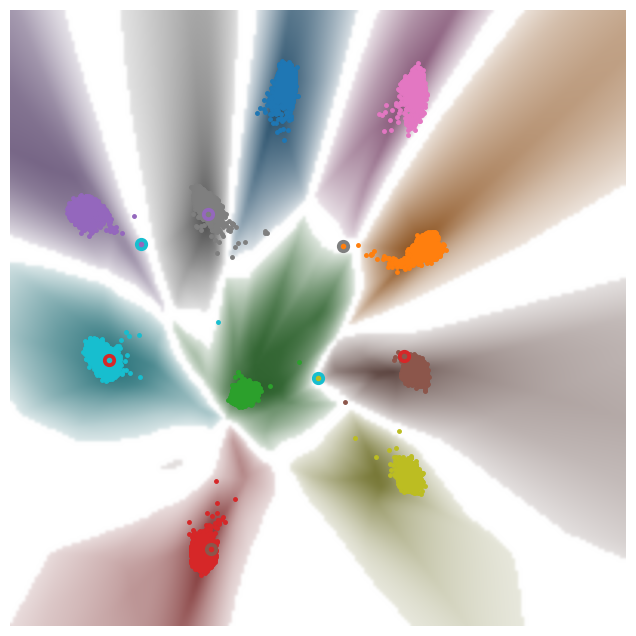

In [15]:
# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)    
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3494.01it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3777.42it/s]


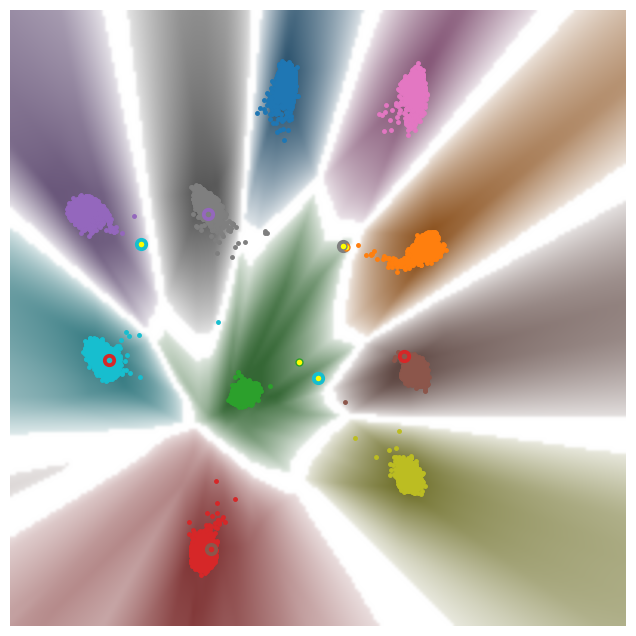

In [21]:

from singleVis.visualizer_hlb_ import visualizer
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)   

vis2 = visualizer(data_provider, projector, 200, "tab10")
vis2.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid2')),th=0.25)

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3554.49it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 3619.47it/s]


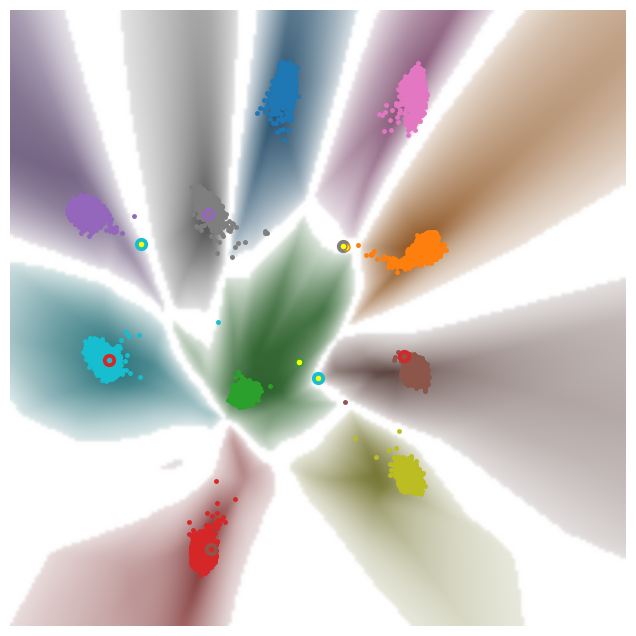

In [20]:

from singleVis.visualizer_hlb_ import visualizer
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)   

vis2 = visualizer(data_provider, projector, 200, "tab10")
vis2.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid2')), th=0.25)

Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 6973.42it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 300/300 [00:00<00:00, 6843.41it/s]


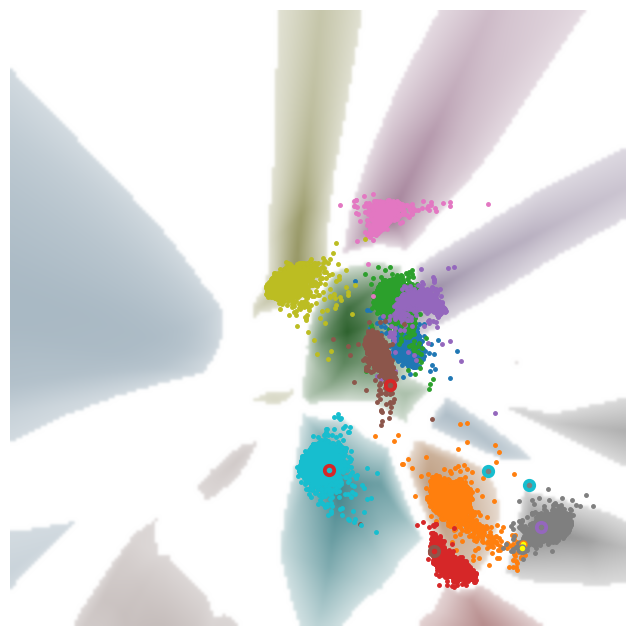

In [17]:

from singleVis.visualizer_hl_b import visualizer
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)   

vis2 = visualizer(data_provider, projector, 200, "tab10")
vis2.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid2')))

In [18]:
"""get high dimensional grid, 2d grid embedding and border vector"""

grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)
train_data_embedding = projector.batch_project(epoch, data_provider.train_representation(epoch))

Computing decision regions ...
Successfully load the DVI visualization model for iteration 6
Successfully load the DVI visualization model for iteration 6


100%|██████████| 200/200 [00:00<00:00, 8041.38it/s]

Successfully load the DVI visualization model for iteration 6


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 12763.36it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 11820.68it/s]


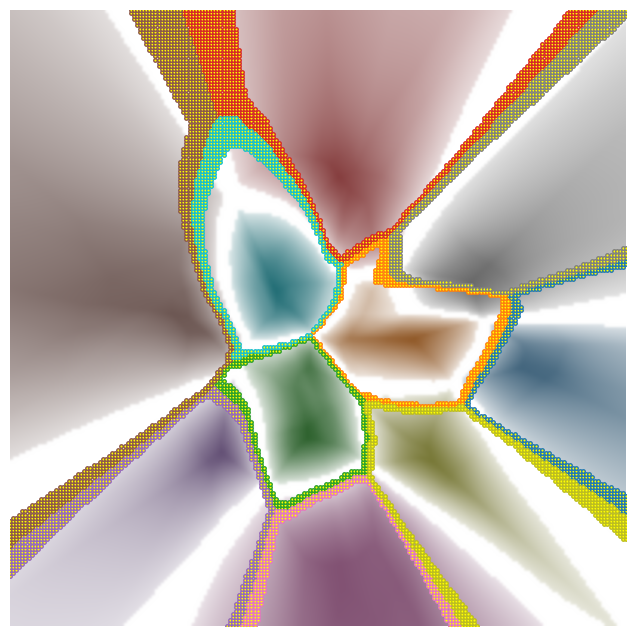

In [18]:
border_indices = np.arange(grid_emd.shape[0])[border==1]
show_list = border_indices
vis.show_grid_embedding(epoch=epoch, data=grid_high[[show_list]], border=border[[show_list]],embedding=grid_emd[show_list], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 14003.55it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 11835.63it/s]


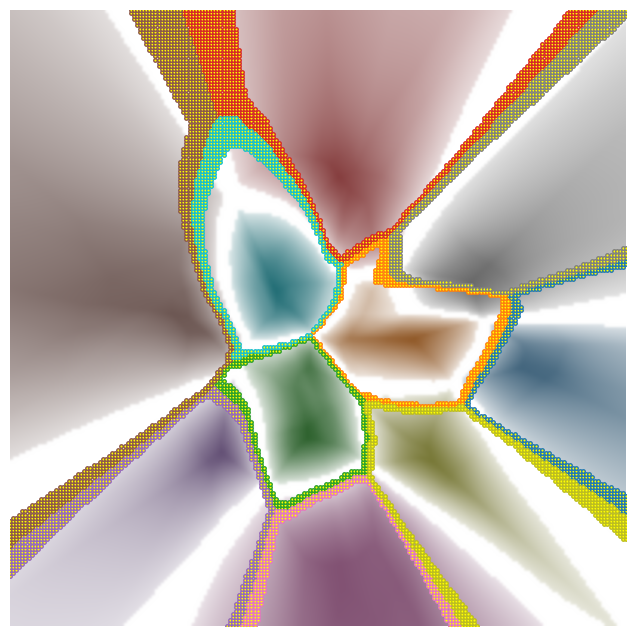

In [19]:
border_indices = np.arange(grid_emd.shape[0])[border==1]
show_list = border_indices
vis.show_grid_embedding(epoch=epoch, data=grid_high[[show_list]], border=border[[show_list]],embedding=grid_emd[show_list], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 29/29 [00:00<00:00, 9218.25it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 29/29 [00:00<00:00, 12764.70it/s]


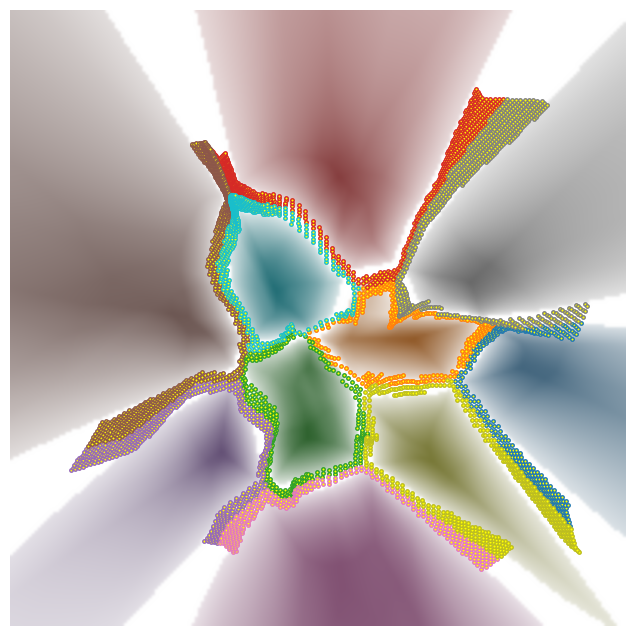

In [20]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[border_indices]], border=border[[border_indices]],embedding=emb_new[border_indices], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 37/37 [00:00<00:00, 12302.94it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 37/37 [00:00<00:00, 12162.17it/s]


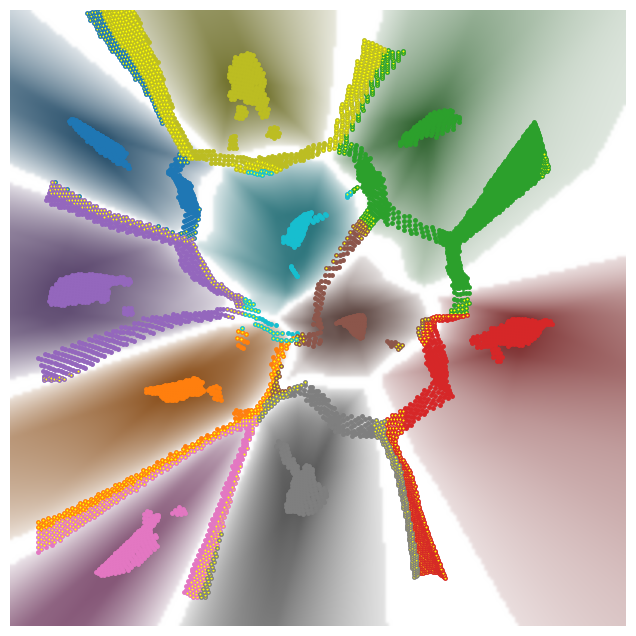

In [24]:
show_list = union_indices
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[union_indices]], border=border[[union_indices]],embedding=emb_new[union_indices], noOutline=True, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

In [14]:
"""get high dimensional grid, 2d grid embedding and border vector"""

grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)
train_data_embedding = projector.batch_project(epoch, data_provider.train_representation(epoch))
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 假设 train_data_embedding 和 grid_emd 都是 numpy arrays，每一行都是一个点
threshold = 20 # 设置你的阈值

# 使用 train_data_embedding 初始化 NearestNeighbors 对象
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_data_embedding)
# 对于 grid_emd 中的每一个点，找到 train_data_embedding 中离它最近的点
distances, indices = nbrs.kneighbors(grid_emd)
# 找到距离小于阈值的索引
mask = distances.ravel() < threshold
selected_indices = np.arange(grid_emd.shape[0])[mask]

border_indices = np.arange(grid_emd.shape[0])[border==1]
union_indices = np.union1d(selected_indices, border_indices)

Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 8149.50it/s]


Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 134/134 [00:00<00:00, 9742.19it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 134/134 [00:00<00:00, 9552.92it/s]


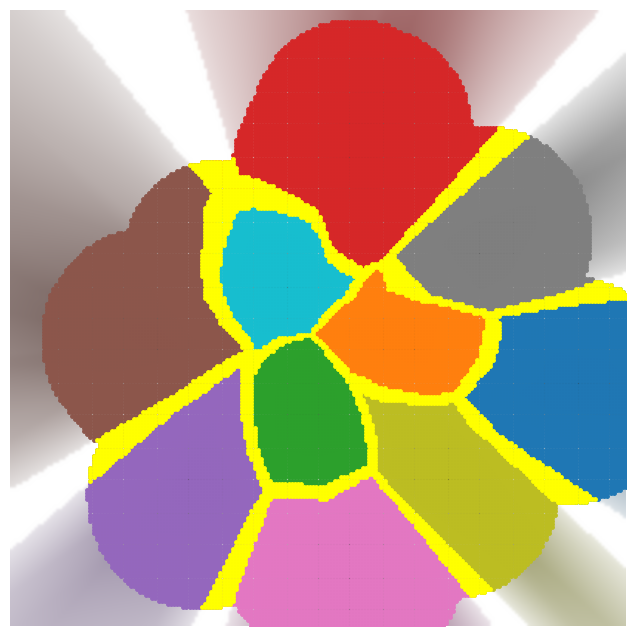

In [15]:
vis.show_grid_embedding(epoch=epoch, data=grid_high[[selected_indices]], embedding=grid_emd[selected_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 149/149 [00:00<00:00, 9350.94it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 149/149 [00:00<00:00, 9304.72it/s]


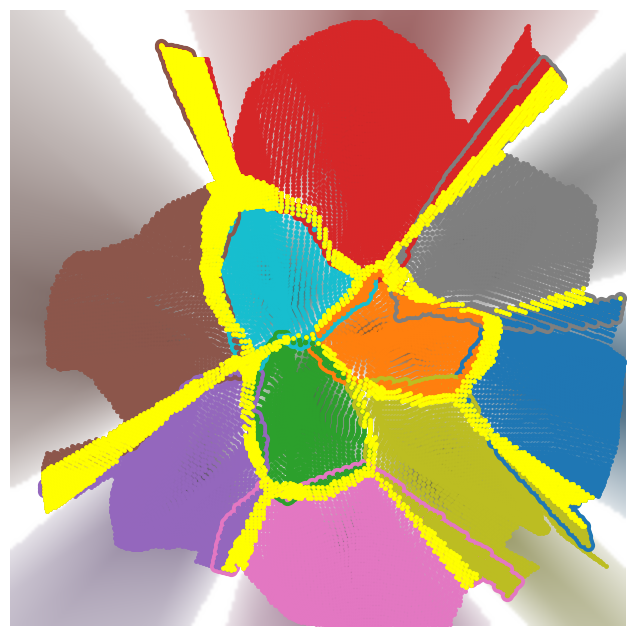

In [16]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[union_indices]], embedding=emb_new[union_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))